In [1]:
!pip install -U transformers
!pip install datasets
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 KB 10.0 MB/s eta 0:00:006.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 24.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached multiprocess-0.70.15-py310-none-any.whl (134 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import tempfile
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TrainingArguments, Trainer

/home/peterdays/Documents/personal/Volupal/ElevaQ/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the DailyDialog dataset
dataset = load_dataset('daily_dialog')

Generating test split: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 107825.50 examples/s]


In [4]:
raw_train_dataset = dataset["train"]
raw_train_dataset[0]

{'dialog': ['Say , Jim , how about going for a few beers after dinner ? ',
  ' You know that is tempting but is really not good for our fitness . ',
  ' What do you mean ? It will help us to relax . ',
  " Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? ",
  " I guess you are right.But what shall we do ? I don't feel like sitting at home . ",
  ' I suggest a walk over to the gym where we can play singsong and meet some of our friends . ',
  " That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . ",
  ' Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . ',
  " Good.Let ' s go now . ",
  ' All right . '],
 'act': [3, 4, 2, 2, 2, 3, 4, 1, 3, 4],
 'emotion': [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]}

In [5]:
# Concatenate all utterances within a dialogue and map to 'dialog' key
def concatenate_utterances(example):
    example['dialog'] = " ".join(example['dialog'])
    return example

# Apply the function to all examples in the dataset
dataset = dataset.map(concatenate_utterances)

Map: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11943.46 examples/s]


In [8]:
dataset["train"][0]

{'dialog': "Say , Jim , how about going for a few beers after dinner ?   You know that is tempting but is really not good for our fitness .   What do you mean ? It will help us to relax .   Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?   I guess you are right.But what shall we do ? I don't feel like sitting at home .   I suggest a walk over to the gym where we can play singsong and meet some of our friends .   That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them .   Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too .   Good.Let ' s go now .   All right . ",
 'act': [3, 4, 2, 2, 2, 3, 4, 1, 3, 4],
 'emotion': [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]}

# make my own dataset

In [ ]:
# https://huggingface.co/learn/nlp-course/chapter5/5

## scrapping the datasets

In [9]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tabula as tb

In [ ]:
path = "data/0000400206.pdf"
data = tb.read_pdf(path, area = (300, 0, 600, 800), pages = Ƈ')

In [11]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.9 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.5 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pdfplumber
path = "data/0000400206.pdf"
# path = "data/DL320_2002.pdf"
with pdfplumber.open(path) as pdf:
    first_page = pdf.pages
    print(first_page[0].chars[0])

{'matrix': (11, 0, 0, 11, 39.5272, 770.0113), 'fontname': 'LGNJCG+Arial-BoldMT', 'adv': 0.722, 'upright': True, 'x0': 39.5272, 'y0': 767.6903, 'x1': 47.4692, 'y1': 778.6903, 'width': 7.942, 'height': 11.0, 'size': 11.0, 'mcid': None, 'tag': None, 'object_type': 'char', 'page_number': 1, 'ncs': 'DeviceRGB', 'text': 'N', 'stroking_color': (0, 0, 0), 'stroking_pattern': None, 'non_stroking_color': (0, 0, 0), 'non_stroking_pattern': None, 'top': 63.30970000000002, 'bottom': 74.30970000000002, 'doctop': 63.30970000000002}


In [55]:
"".join([e["text"] for e in first_page[0].chars])

'N.º 20 29 de janeiro de 2021 Pág. 4Diário da República, 1.ª série PRESIDÊNCIA DO CONSELHO DE MINISTROSDecreto-Lei n.º 9/2021de 29 de janeiroSumário: Aprova o Regime Jurídico das Contraordenações Económicas.No interesse da maximização do bem -estar, da segurança e da proteção dos direitos dos con-sumidores, para o regular funcionamento dos mercados e a competitividade da economia e para a promoção da concorrência, é exigida a intervenção reguladora do Estado.Com o objetivo de promover e defender esses valores, tem vindo a assistir -se a uma disper-são legislativa resultante da multiplicação de legislação enquadradora e reguladora do acesso e do exercício de atividades económicas, a qual, cominando com coima a violação das respetivas disposições, constitui -se como uma fonte de direito contraordenacional em matéria económica.Não obstante o enquadramento comum fixado no Regime Geral do Ilícito de Mera Ordena-ção Social, constante do Decreto -Lei n.º 433/82, de 27 de outubro, alterado pel

In [64]:
import pdfplumber
path = "data/0000400206.pdf"
path = "data/DL320_2002.pdf"
with pdfplumber.open(path) as pdf:
    pages = pdf.pages

    text = pages[0].extract_text_simple(x_tolerance=3, y_tolerance=3)
    text1 = pages[0].extract_text(x_tolerance=3, y_tolerance=3, layout=False, x_density=7.25, y_density=13)


In [65]:
text1

'8160 DIÁRIODAREPÚBLICA—ISÉRIE-A N.o300—28deDezembrode2002\nCAPÍTULOIV Maria Manuela Dias Ferreira Leite—Carlos Manuel\nTavaresdaSilva.\nDisposiçõesfinaisetransitórias\nPromulgadoem20deDezembrode2002.\nArtigo49.o\nPublique-se.\nDisposiçõesrevogadas\nOPresidentedaRepública,JORGESAMPAIO.\n1 — Revoga-se expressamente o Decreto-Lei\nn.o 433/91, de 7 de Novembro, alterado pelos Decre- Referendadoem20deDezembrode2002.\ntos-Leis n.os 175/94, de 27 de Junho, e 230/98, de 22\nO Primeiro-Ministro, José Manuel Durão Barroso.\nde Julho, o Decreto-Lei n.o 58/99, de 2 de Março, e\na alínea p) do n.o 1.o da Portaria n.o 95/94, de 9 de\nFevereiro.\n2—Asremissõesfeitasparapreceitosrevogadospor\nMINISTÉRIODASCIDADES,ORDENAMENTO\neste decreto-lei devem entender-se como substituídas\nDOTERRITÓRIOEAMBIENTE\nporremissõesfeitasparaascorrespondentesdisposições\ndestediploma.\nDecreto-Lein.o320/2002\nArtigo50.o\nde28deDezembro\nDisposiçõestransitórias\nNas últimas décadas, a opção por edifícios de habi-\n1—As 

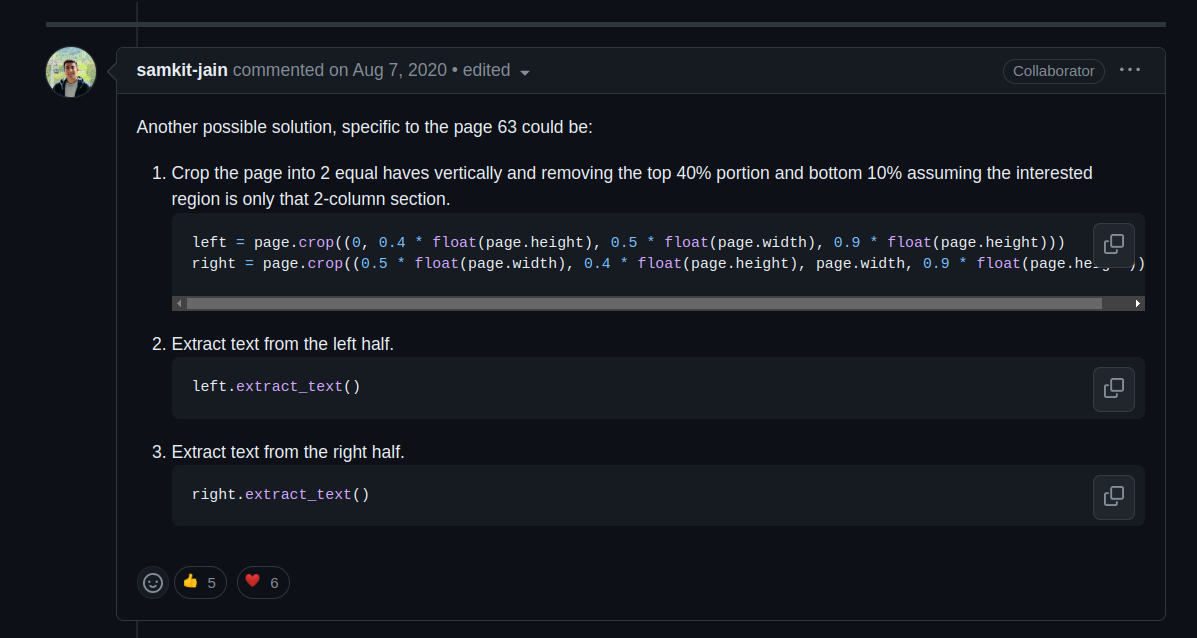

https://github.com/jsvine/pdfplumber/issues/244